In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Extract_Inversion_Rh import extract_inversion_rh
from Extract_Observation_Rh import extract_observation_rh

In [35]:
years = ['2009']
i_rh = extract_inversion_rh(years)

In [36]:
o_rh = extract_observation_rh(years)

def trans_time(i):
    if i[-2:] == '00':
        m = '08'
    elif i[-2:] == '12':
        m = '20'
    return i[:-2] + m

o_rh.index = [trans_time(i) for i in o_rh.index]
o_rh.columns = i_rh.columns

In [37]:
print(o_rh.shape, i_rh.shape)

(728, 47) (641, 47)


In [38]:
for i in i_rh.index:
    if i[-2:] == '20':
        i_rh.drop(i, inplace=True)

In [39]:
def MSE(y, t):
    return np.sum((y - t)**2)**0.5

def MSE1(x):
    return  np.sum(x**2)/len(x)

def MAE1(x):
    return np.sum(np.abs(x))/len(x)

In [40]:
data = pd.DataFrame(columns=i_rh.columns)

for i in i_rh.index:
    if i in o_rh.index:
        data.loc[i] = o_rh.loc[i] - i_rh.loc[i]

In [41]:
for i in data.columns:
    # print(MSE1(data[i]).round(2), MAE1(data[i]).round(4))
    data.loc['mse', i] = MSE1(data[i]).round(2)
    data.loc['mae', i] = MAE1(data[i]).round(4)

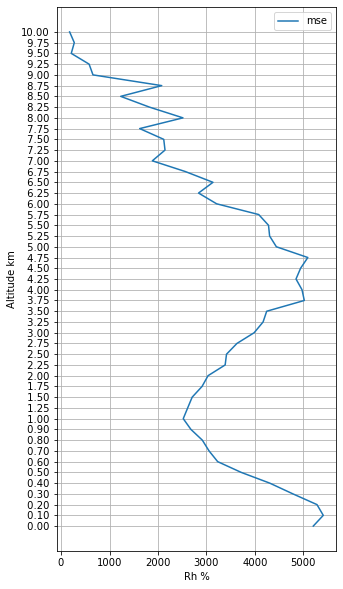

In [43]:
plt.figure(figsize=(5,10))
Height = data.columns
plt.plot(data.loc['mse'], Height, label='mse')
# plt.plot(data.loc['mae'], Height, label='mae')
plt.xlabel('Rh %')
plt.ylabel('Altitude km')
plt.legend()
plt.grid()

path = r'J:\000 - InBox - 下载\Desktop\\'
plt.savefig(path+'mse08.png', bbox_inches = 'tight')
plt.show()